In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
print(observations.head())
print(species_info.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [2]:
print(observations.dtypes)
print(species_info.dtypes)


scientific_name    object
park_name          object
observations        int64
dtype: object
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object


In [3]:
print(observations.park_name.value_counts())

park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64


In [4]:
print(species_info.conservation_status.value_counts())
print(species_info.category.value_counts())

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64
category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64


Text(0.5, 1.0, 'Status of Conservation')

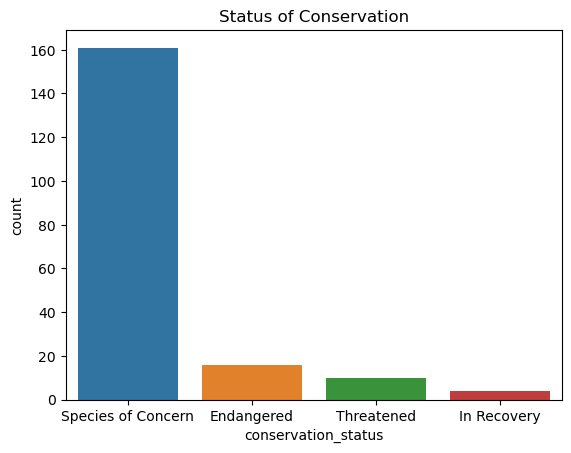

In [5]:

sns.countplot(x = 'conservation_status', data = species_info)
plt.title('Status of Conservation')

In [6]:
species_info['conservation_status'].fillna(value = 'No Concern', inplace = True)

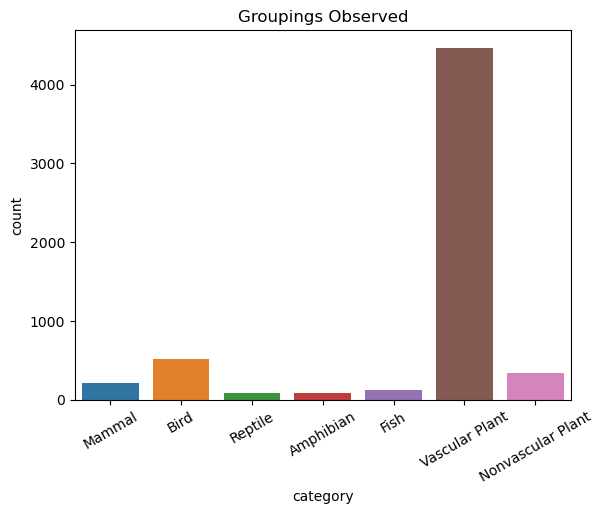

In [7]:
sns.countplot(x = 'category', data = species_info)
plt.xticks(rotation=30)
plt.title('Groupings Observed')
plt.show()



In [8]:
grouped_df = observations.groupby(['scientific_name', 'park_name'])['observations'].sum().unstack()
grouped_df.reset_index(inplace=True)


grouped_df.to_csv('grouped_observations.csv', index = False)